## Importeer libraries

In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist

## Data

In [2]:
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = mnist.load_data()

## Trainingsdata:

In [3]:
print("Afbeeldingen:", X_train_images.shape)

Afbeeldingen: (60000, 28, 28)


In [4]:
print("Labels:", y_train_labels.shape )

Labels: (60000,)


In [5]:
# checken hoeveel unique labels er zijn
classes = np.unique(y_train_labels)
num_classes = len(np.unique(y_train_labels))
print("Aantal unieke labels:", num_classes)
print("Unieke labels:", classes)

Aantal unieke labels: 10
Unieke labels: [0 1 2 3 4 5 6 7 8 9]


## Testdata:

In [6]:
print("Afbeeldingen:", X_test_images.shape)

Afbeeldingen: (10000, 28, 28)


In [7]:
print("Labels:", y_test_labels.shape)

Labels: (10000,)


In [8]:
print("Eerste 20 labels:", y_train_labels[:20])

Eerste 20 labels: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


## Toon 12 random cijfers

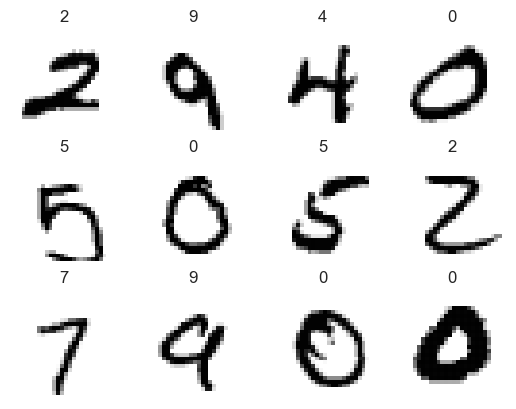

In [9]:
for sub in range(1, 13):
        plt.subplot(3,4, sub)
        i = np.random.randint(60000)

        #plt.imshow(X_train_images[i], cmap='gray')
        plt.imshow(255 - X_train_images[i], cmap='gray')
        plt.title(y_train_labels[i]);
        plt.axis("off")

## Maak de images geschikt voor ML modellen

**OPDRACHT**: "flatten" de images naar een nieuwe data structuur met dimensies (60000, 28*28)

In [10]:
print("Number of dimensions: {}".format(X_train_images.ndim))

Number of dimensions: 3


In [11]:
# Omzetten van de X_train_images AND X_test_images array naar een 2D array
flattened_X_train_images = X_train_images.reshape(X_train_images.shape[0], -1)
print("Vorm van de afgevlakte array(flattened_X_train_images):", flattened_X_train_images.shape)

flattened_X_test_images = X_test_images.reshape(X_test_images.shape[0], -1)
print("Vorm van de afgevlakte array(flattened_X_test_images):", flattened_X_test_images.shape)

Vorm van de afgevlakte array(flattened_X_train_images): (60000, 784)
Vorm van de afgevlakte array(flattened_X_test_images): (10000, 784)


## k-Nearest Neighbours

Het is beter om in eerste instantie slechts een deel van de training set en de test set te gebruiken, bijvoorbeeld 10%.

Het trainen duurt niet lang, maar het voorspellen kan zeer rekenintensief zijn.

Gebruik %%timeit om deze bewering te controleren.

In [12]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

**OPDRACHT**: train de kNN met fit() en pas het model toe met predict(). Kies eerst 10% van de train set en test set. Je mag dat later verruimen.

In [13]:
%%timeit
# train 10% van de trainings- en testgegevens 
knn.fit(flattened_X_train_images[:6000,:], y_train_labels[:6000])

508 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [14]:
%%timeit
# predict 10% van de trainings- en testgegevens 
y_predicted_labels = knn.predict(flattened_X_test_images[:1000,:])

147 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
# nog een keertje zonder de %%timeit
y_predicted_labels = knn.predict(flattened_X_test_images[:1000,:])
acc = accuracy_score(y_test_labels[:1000], y_predicted_labels[:1000])

In [16]:
print(f"Nauwkeurigheid: {acc}")

Nauwkeurigheid: 0.919


**OPDRACHT**: Hoeveel sneller is het testen ten opzichte van het trainen?

In [17]:
print (0.149 / 0.514) 

0.28988326848249024


**We nemen nu de hele dataset**

In [18]:
%%timeit
# train 100% van de trainings- en testgegevens 
knn.fit(flattened_X_train_images, y_train_labels)

3.16 ms ± 43.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
# predict 100% van de trainings- en testgegevens 
y_predicted_labels = knn.predict(flattened_X_test_images)

13.1 s ± 293 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
# nog een keertje zonder de %%timeit
y_predicted_labels = knn.predict(flattened_X_test_images)
acc = accuracy_score(y_test_labels, y_predicted_labels)

In [21]:
print(f"Nauwkeurigheid: {acc}")

Nauwkeurigheid: 0.9691


In [24]:
cm = confusion_matrix(y_test_labels[:1000], y_predicted_labels[:1000])

print(cm)

[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  2   0 108   0   0   0   1   4   1   0]
 [  0   1   0 101   0   2   0   2   0   1]
 [  1   1   0   0 102   0   1   0   0   5]
 [  0   0   0   0   1  85   0   0   0   1]
 [  1   0   0   0   1   0  85   0   0   0]
 [  0   1   0   0   1   0   0  97   0   0]
 [  1   1   0   3   0   0   0   0  83   1]
 [  0   0   0   0   0   0   0   1   1  92]]


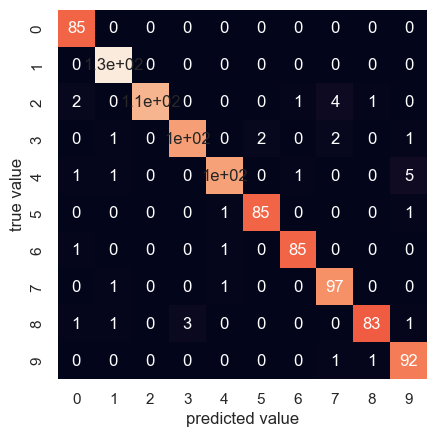

In [25]:
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Toon 12 voorbeelden van fouten van het model

In [32]:
# bekijken welke cijfers fout zijn gecategoriseerd.
mistakes = y_test_labels[:1000] != y_predicted_labels[:1000]

In [33]:
# bekijken aantal voorbeelden van de eerste 100 mistakes
print(mistakes[:100])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [34]:
# print het aantal fouten die er zijn
print(np.count_nonzero(mistakes))

36


**OPDRACHT**: schrijf de code om naar alleen fout geclassificeerde cijfers.

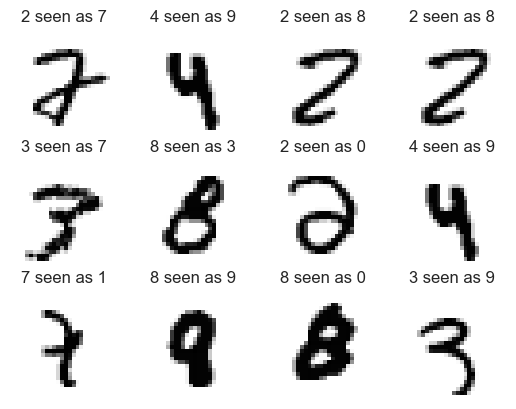

In [40]:
for sub in range(1, 13):
    plt.subplot(3,4, sub)
    while True:
        i = np.random.randint(1000)
        predicted_number = y_predicted_labels[i]
        actual_number = y_test_labels[i]
        if predicted_number != actual_number:
            plt.imshow(255 - X_test_images[i,:,:], cmap='gray')
            plt.axis("off")
            plt.title('{0} seen as {1}'.format(actual_number, predicted_number))
            break